In [1]:
import sympy
sympy.init_printing()

[Link to paper](https://arxiv.org/pdf/astro-ph/0404240.pdf)

Equation 1

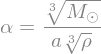

In [2]:
M_sol = sympy.Symbol('M_{\odot}', positive=True) # Solar mass
rho = sympy.Symbol('rho', positive=True) # Stellar / planetary density
a = sympy.Symbol('a', positive=True) # Semi major axis
alpha = sympy.Symbol('alpha', positive=True) # Opening angle
eqn_1 = sympy.Eq(alpha,(M_sol/rho/a**3)**sympy.Rational(1,3))
eqn_1

Definition the Hill velocity

In [3]:
v_H = sympy.Symbol('v_H', positive=True) # Hill velocity
R_H = sympy.Symbol('R_H', positive=True) # Hill radius
Omega = sympy.Symbol('Omega', positive=True) # Keplerian frequency
hill_velocity = sympy.Eq(v_H, R_H*Omega)
hill_velocity

The authors claim that $v_H \approx v_e \alpha^{1/2}$ where $v_e$ is the escape velocity from the planet. Let's verify that

We obtained a different result. What if it's the escape velocity from the planet instead?

In [6]:
G = sympy.Symbol('G', positive=True) # Gravitation constant
M_p = sympy.Symbol('M_p', positive=True) # Planet mass
R_p = sympy.Symbol('R_p', positive=True) # Planet's radius
temp = sympy.Eq(v_H/sympy.sqrt(G*M_p/R_p)/sympy.sqrt(alpha),1)
temp = temp.subs(hill_velocity.lhs, hill_velocity.rhs)
temp = temp.subs(Omega, sympy.sqrt(G*M_sol/a**3))
temp = temp.subs(R_H, a*(M_p/M_sol)**sympy.Rational(1,3))
temp = temp.subs(R_p, (M_p/rho)**sympy.Rational(1,3))
temp = temp.subs(sympy.solve(eqn_1,M_sol,dict=True)[0])
temp

Derivation of equation 2

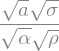

In [15]:
sigma = sympy.Symbol('sigma', positive=True) # Disc surface density
temp = sympy.Eq(M_p, a*R_H*sigma)
temp = temp.subs(R_H, a*(M_p/M_sol)**sympy.Rational(1,3))
temp = temp.subs(M_p,rho*R_p**3)
temp = temp.subs(sympy.solve(eqn_1,M_sol,dict=True)[0])
eqn_2_rhs = sympy.solve(temp, R_p)[0]
eqn_2_rhs

Derivation of equation 3

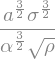

In [88]:
temp = rho*R_p**3
temp = temp.subs(R_p, eqn_2_rhs)
eqn_3_rhs = temp
eqn_3_rhs

Derivation of equation 4

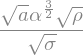

In [91]:
temp = sigma*a**2/eqn_3_rhs
eqn_4_rhs = temp
eqn_4_rhs

Derivation of equation 5

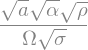

In [52]:
v_e = sympy.Symbol('v_e', positive=True) # Escape velocity
temp = eqn_3_rhs/(R_p**2*sigma*Omega*v_e**2/v_H**2)
temp = temp.subs(hill_velocity.lhs, hill_velocity.rhs)
temp = temp.subs(R_H, a*(M_p/M_sol)**sympy.Rational(1,3))
temp = temp.subs(v_e, sympy.sqrt(G*M_p/R_p))
temp = temp.subs(sympy.solve(Omega**2-G*M_sol/a**3,G,dict=True)[0])
temp = temp.subs(sympy.solve(eqn_1,M_sol,dict=True)[0])
temp = temp.subs(M_p, rho*R_p**3)
temp = temp.subs(R_p, eqn_2_rhs)
eqn_5_rhs = temp
eqn_5_rhs

We verify equation 7

In [59]:
temp = sympy.Eq(v_H,R_p*Omega/alpha)
temp = temp.subs(hill_velocity.lhs, hill_velocity.rhs)
temp = temp.subs(R_H, a*(M_p/M_sol)**sympy.Rational(1,3))
temp = temp.subs(M_p, rho*R_p**3)
temp = temp.subs(sympy.solve(eqn_1,M_sol,dict=True)[0])
temp = temp.simplify()
temp

To derive equation 8, we need to formulae. The first is the collision rate for small bodies

$\frac{\Omega \sigma}{\rho s}$

and the other is the viscous stirring rate (equation 29 in [the other Goldreich, Lithwick and Sari 2004](https://authors.library.caltech.edu/1019/1/GOLaraa04.pdf))

$\frac{\sigma \Omega}{\rho R_{iso}} \left(\frac{v_e}{v_H}\right)^4$

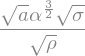

In [107]:
s = sympy.Symbol('s', positive=True) # Size of small body
temp = sympy.Eq(Omega*sigma/rho/s,sigma*Omega/rho/eqn_2_rhs/alpha**2)
eqn_8_rhs = sympy.solve(temp,s)[0]
eqn_8_rhs

Equation 10. The two terms on the left hand side are equations 33 and 30 from [Goldreich, Lithwick and Sari 2004](https://authors.library.caltech.edu/1019/1/GOLaraa04.pdf)

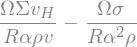

In [110]:
Sigma = sympy.Symbol('Sigma', positive=True) # Mass surface density of large bodies
v = sympy.Symbol('v', positive=True) # Velocity of the big bodies
eqn_10_rhs = Sigma*Omega/rho/R/alpha*(v_H/v) - sigma*Omega/rho/R/alpha**2
eqn_10_rhs

Equation 11

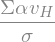

In [113]:
eqn_11_rhs = sympy.solve(eqn_10_rhs, v)[0] 
eqn_11_rhs

To derive equation 12, we need equations 29 and 27 from [Goldreich, Lithwick and Sari 2004](https://authors.library.caltech.edu/1019/1/GOLaraa04.pdf)

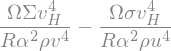

In [115]:
u = sympy.Symbol('u', positive=True) # Velocity dispersion of the small particles
eqn_12_rhs = (Sigma*Omega/rho/R)*(v_H/v)**4/alpha**2 - (sigma*Omega/rho/R)*(v_H/u)**4/alpha**2
eqn_12_rhs

Equation 13

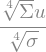

In [119]:
eqn_13_rhs = sympy.solve(eqn_12_rhs,v)[0]
eqn_13_rhs